### Time Analysis

Small analysis of how much time it takes each experiment to run, for deciding the parameter grid to explore.

In [5]:
import pandas as pd

df = pd.read_csv("../results/results.csv")

In [6]:
df = df.fillna(0)
df["total_time_sec"] = df["build_time_sec"] + df["candidate_time_sec"] + df["eval_time_sec"]

In [7]:
from sklearn.linear_model import LinearRegression

X = df[["k", "m", "threshold"]]
y = df["total_time_sec"]

models = {}
# For each threshold, fit a separate model
for threshold in df["threshold"].unique():
    print(f"\nThreshold: {threshold}")
    X_thresh = X[X["threshold"] == threshold][["k", "m"]]
    y_thresh = y[X["threshold"] == threshold]

    model = LinearRegression()
    model.fit(X_thresh, y_thresh)
    print(f"Regression coefficients for threshold {threshold}:")
    for feature, coef in zip(X_thresh.columns, model.coef_):
        print(f"  {feature}: {coef:.4f}")
    models[threshold] = model


Threshold: 0.9
Regression coefficients for threshold 0.9:
  k: -176.8347
  m: 742.2422

Threshold: 0.8
Regression coefficients for threshold 0.8:
  k: 1.5817
  m: 1.7322

Threshold: 0.85
Regression coefficients for threshold 0.85:
  k: -1.4325
  m: -5.4340


c:\Users\UPCnet\Documents\MDS\IRRS\Lab6\.venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
c:\Users\UPCnet\Documents\MDS\IRRS\Lab6\.venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
c:\Users\UPCnet\Documents\MDS\IRRS\Lab6\.venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


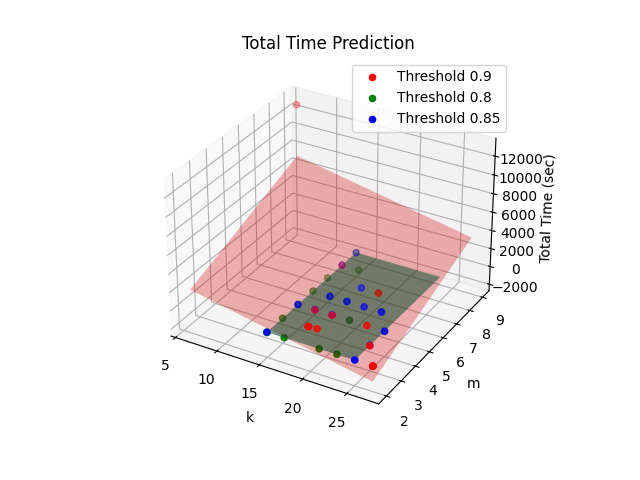

In [8]:
%matplotlib widget
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Plot 3D scatter plots of actual vs predicted times for each threshold
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")
for (threshold, model), color in zip(models.items(), ["r", "g", "b"]):
    X_thresh = X[X["threshold"] == threshold][["k", "m"]]
    y_thresh = y[X["threshold"] == threshold]

    ax.scatter(X_thresh["k"], X_thresh["m"], y_thresh, c=color, marker="o", label=f"Threshold {threshold}")
    # ax.scatter(X_thresh["k"], X_thresh["m"], y_pred, c="r", marker="^", label=f"Predicted {threshold}")
    # Plot the predicted as a surface
    k_range = sorted(X_thresh["k"].unique())
    m_range = sorted(X_thresh["m"].unique())
    k_grid, m_grid = np.meshgrid(k_range, m_range)
    y_grid = model.predict(np.c_[k_grid.ravel(), m_grid.ravel()]).reshape(k_grid.shape)
    ax.plot_surface(k_grid, m_grid, y_grid, color=color, alpha=0.3)

ax.set_xlabel("k")
ax.set_ylabel("m")
ax.set_zlabel("Total Time (sec)")
ax.set_title(f"Total Time Prediction")
ax.legend()
plt.show()